In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:/Unifield-internship/Project/Supply Chain Management/supply_chain_data.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [21]:
da = df.copy()

# Feature Engineering:

In [8]:
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')

selected_feature = ['Date','Price','Stock levels','Order quantities','Lead time','Number of products sold']

df1 = df[selected_feature]

df1['Date'] = pd.to_datetime(df1['Date'])

df1 = df1.sort_values(by='Date')

df1.head()

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_14360\3767346053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])


,Date,Price,Stock levels,Order quantities,Lead time,Number of products sold
0,2024-01-01,69.808006,58,96,29,802
1,2024-01-02,14.843523,53,37,23,736
2,2024-01-03,11.319683,1,88,12,8
3,2024-01-04,61.163343,23,59,24,83
4,2024-01-05,4.805496,5,56,5,871


# Time Series Analysis

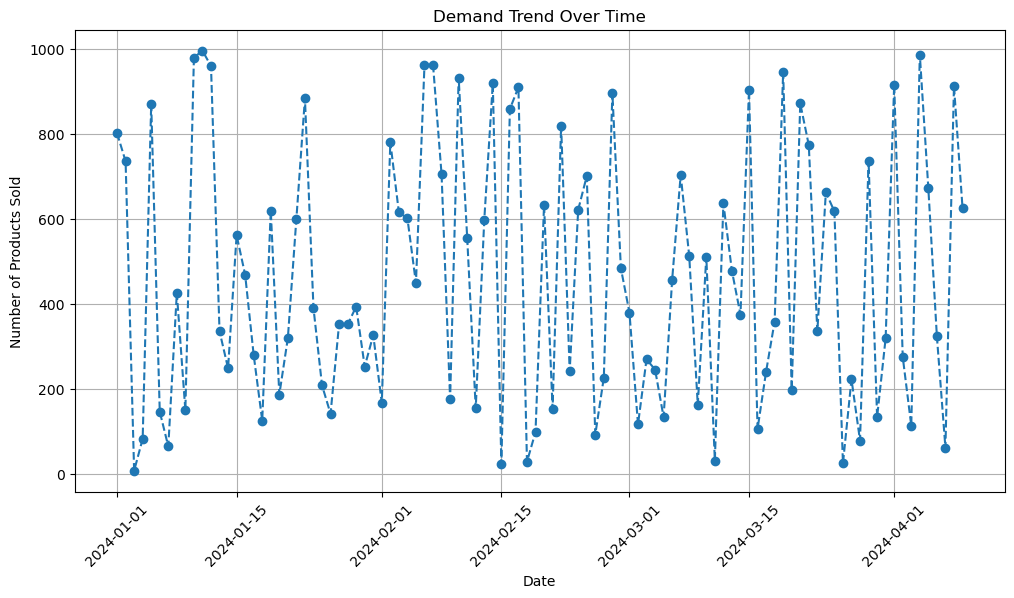

In [11]:
import matplotlib.pyplot as plt

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Number of products sold'], marker='o', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Number of Products Sold")
plt.title("Demand Trend Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Model Selection & Training:

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Set Date as index
df1.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df1['Number of products sold'], order=(5,1,0))
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)

# Print forecast
print("Forecasted Demand:", forecast)

Forecasted Demand: 2024-04-10    442.241947
2024-04-11    550.445766
2024-04-12    608.132867
2024-04-13    455.442897
2024-04-14    580.397661
2024-04-15    586.275276
2024-04-16    519.006491
2024-04-17    532.950002
2024-04-18    575.268316
2024-04-19    535.045049
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\DHRUV\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DHRUV\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DHRUV\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare data
df1['Day'] = df1.index.dayofyear  # Convert date to numeric format
X = df1[['Day', 'Price', 'Stock levels', 'Order quantities', 'Lead time']]
y = df1['Number of products sold']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict demand
y_pred = model.predict(X_test)

# Display predictions
print("Predictions:", y_pred)

Predictions: [235.20389 363.3927  588.8405  442.9318  348.00732 711.76715 337.21735
 451.91922 376.8815  780.455   565.57684 481.6328  171.9303  305.99557
 848.2693   59.51559 646.3145  489.64716 398.01328 526.4914 ]


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

da['Date'] = pd.date_range(start='2024-01-01', periods=len(da), freq='D')
da['Date'] = pd.to_datetime(da['Date'])

da.set_index('Date', inplace=True)

sales_date = da[['Number of products sold']]

scaler = MinMaxScaler(feature_range=(0,1))
sales_scaled = scaler.fit_transform(sales_date)

def create_sequence(data, time_steps=10):
    X,y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i: i+time_steps])
        y.append(data[i: i+time_steps])
    return np.array(X), np.array(y)


#Create time-stemp
time_steps = 10
X, y = create_sequence(sales_scaled, time_steps)

#Reshape X to fit into LSTM:
X = X.reshape(X.shape[0], X.shape[1],1)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True ,input_shape=(time_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16)

#Make prediction:
# Predict next 10 days
last_sequence = sales_scaled[-time_steps:]  # Use last known data
last_sequence = last_sequence.reshape(1, time_steps, 1)  # Reshape for LSTM

future_predictions = []
for _ in range(10):
    next_day_pred = model.predict(last_sequence)
    future_predictions.append(next_day_pred[0][0])
    
    # Shift sequence and add new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[0, -1, 0] = next_day_pred

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Forecasted Demand:", future_predictions)


Epoch 1/50


C:\Users\DHRUV\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2819
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2104 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1443 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0962 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0879 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0908 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0844 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0833 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0831 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0836 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0849 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0845
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0821 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0828 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0850 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

# Model Evalution & Insights:

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Compute MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2%}")

RMSE: 422.5582740828237
MAPE: 249.85%
